# ML Regression using Weather Station Data

Use data from multiple weather stations around the UK to predict the temperature in Cambridge

* Data downloaded and formatted using: https://github.com/scott-hosking/get_station_data
* Data used in this example can be downloaded [here](https://raw.githubusercontent.com/scott-hosking/get_station_data/master/Examples/UK_weather_station_data_ghcnm.csv)

### Import python libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Read in data and print the last few rows

In [2]:
df = pd.read_csv('UK_weather_station_data_ghcnm.csv')
df.tail()

,country,name,station,lat,lon,elev,year,month,variable,value,dmflag,qcflag,dsflag
52135,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,8,TAVG,NaN,,,
52136,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,9,TAVG,NaN,,,
52137,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,10,TAVG,NaN,,,
52138,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,11,TAVG,NaN,,,
52139,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,12,TAVG,NaN,,,


### Add decimal year to dataframe
e.g., July 1969 --> 1969.5

In [3]:
df['year_fraction'] = df['year'] + ( (df['month']-1) / 12.)
df.tail()

,country,name,station,lat,lon,elev,year,month,variable,value,dmflag,qcflag,dsflag,year_fraction
52135,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,8,TAVG,NaN,,,,2018.583333
52136,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,9,TAVG,NaN,,,,2018.666667
52137,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,10,TAVG,NaN,,,,2018.750000
52138,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,11,TAVG,NaN,,,,2018.833333
52139,UNITED KINGDOM,BELFAST/ALDER,65103917000,54.65,-6.22,81,2018,12,TAVG,NaN,,,,2018.916667


### Lets take a look at the data

Text(0, 0.5, 'temperature (degrees C)')

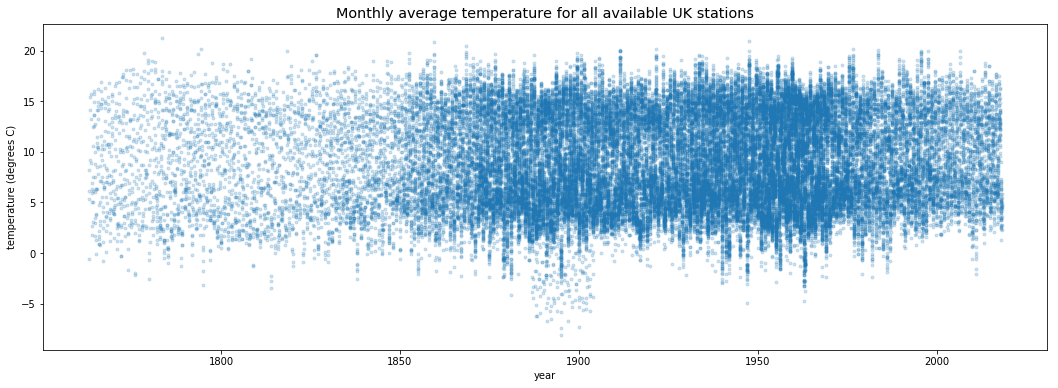

In [4]:
plt.figure(figsize=(18,6))
plt.plot(df['year_fraction'], df['value'], '.', alpha=0.2)
plt.title('Monthly average temperature for all available UK stations', size='x-large')
plt.xlabel('year')
plt.ylabel('temperature (degrees C)')

the period 1915 to 1960 looks to have a lot of data... we'll focus in on this period later

### Print out all the unique station names

In [5]:
print(np.unique(df['name']))

['ABERDEEN/DYCE' 'ABERYSTWYTH UK' 'BELFAST/ALDER' 'BEN NEVIS UK'
 'BENTWATERS' 'BIDSTON UK' 'BIRMINGHAM/AI' 'BOURNEMOUTH A' 'BRAEMAR UK'
 'CAMBRIDGE UK' 'COCKLE PARK UK' 'DUMFRIES UK' 'DURHAM UK' 'EDGBASTON UK'
 'EDINBURGH AIR' 'EDINBURGH/ROYAL OBS.UK' 'ESKDALEMUIR' 'FAIRFORD'
 'FELIXSTOWE' 'FORT WILLIAM' 'GLAMORGAN/RHOUSE AP' 'GLASGOW AIRPO'
 'GORDON CASTLE UK' 'GORLESTON' 'GREENHAM' 'GREENWICH/MARITIME MUK'
 'GUERNSEY AIRP' 'HUNTINGTON' 'KEW UK' 'LAKENHEATH' 'LARKHILL' 'LEEMING'
 'LERWICK' 'LONDON/GATWIC' 'MANCHESTER AI' 'MILDENHALL' 'ORKNEY UK'
 'OSBORNE UK' 'OXFORD' 'OXFORD UK' 'PLYMOUTH WC' 'ROSS-ON-WYE UK'
 'ROTHAMSTEAD UK' 'SCARBOROUGH UK' 'SCULTHORPE' 'SHEFFIELD UK'
 'SOUTHAMPTON/' 'STONYHURST UK' 'STORNOWAY' 'TIREE' 'TRURO UK'
 'UPPER HEYFORD' 'VALLEY' 'WADDINGTON' 'WARRINGTON' 'WETHERSFIELD'
 'WOODBRIDGE' 'YORK UK']


### Plot data for Cambridge

Text(0, 0.5, 'temperature (degrees C)')

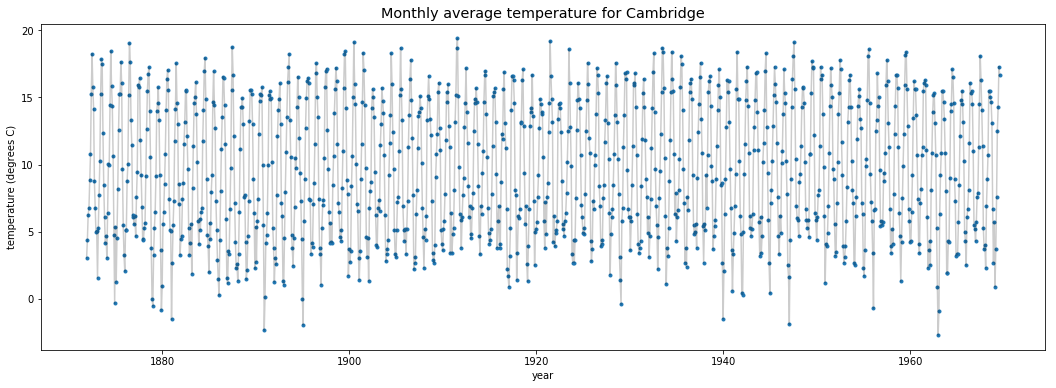

In [7]:
df_cambridge  = df[ df['name'] == 'CAMBRIDGE UK' ]

plt.figure(figsize=(18,6))
plt.plot(df_cambridge['year_fraction'], df_cambridge['value'], '.')
plt.plot(df_cambridge['year_fraction'], df_cambridge['value'], 'k-', alpha=0.2)
plt.title('Monthly average temperature for Cambridge', size='x-large')
plt.xlabel('year')
plt.ylabel('temperature (degrees C)')

# Rearrange data: give each station its own column with time in rows

In [138]:
### strip out columns we don't want
df_strip = df.drop(axis=1,labels=['country','lat','lon','elev','station','dmflag','qcflag','dsflag','variable'])

### re-arrange columns 
df_strip = df_strip[['year_fraction','year','month','name','value']]

### Get all unique station names
stn_names = np.unique(df_strip['name'])

### loop through stations, one at a time, process data then merge together
for i, stn_name in enumerate(stn_names):
    df_tmp = df_strip[ df_strip['name'] == stn_name ]
    df_tmp = df_tmp.rename(index=str, columns={"value": "stn_"+stn_name}).drop(axis=1,labels='name')
    
    if i == 0:
        df1 = df_tmp
    else:
        df1 = pd.merge(df1,df_tmp,how='outer')

df1 = df1.sort_values(by='year_fraction')

df1.tail()

,year_fraction,year,month,stn_ABERDEEN/DYCE,stn_ABERYSTWYTH UK,stn_BELFAST/ALDER,stn_BEN NEVIS UK,stn_BENTWATERS,stn_BIDSTON UK,stn_BIRMINGHAM/AI,...,stn_STORNOWAY,stn_TIREE,stn_TRURO UK,stn_UPPER HEYFORD,stn_VALLEY,stn_WADDINGTON,stn_WARRINGTON,stn_WETHERSFIELD,stn_WOODBRIDGE,stn_YORK UK
1771,2018.583333,2018,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1772,2018.666667,2018,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,2018.750000,2018,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1774,2018.833333,2018,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,2018.916667,2018,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df1.columns

Index(['year_fraction', 'year', 'month', 'stn_ABERDEEN/DYCE',
       'stn_ABERYSTWYTH UK', 'stn_BELFAST/ALDER', 'stn_BEN NEVIS UK',
       'stn_BENTWATERS', 'stn_BIDSTON UK', 'stn_BIRMINGHAM/AI',
       'stn_BOURNEMOUTH A', 'stn_BRAEMAR UK', 'stn_CAMBRIDGE UK',
       'stn_COCKLE PARK UK', 'stn_DUMFRIES UK', 'stn_DURHAM UK',
       'stn_EDGBASTON UK', 'stn_EDINBURGH AIR', 'stn_EDINBURGH/ROYAL OBS.UK',
       'stn_ESKDALEMUIR', 'stn_FAIRFORD', 'stn_FELIXSTOWE', 'stn_FORT WILLIAM',
       'stn_GLAMORGAN/RHOUSE AP', 'stn_GLASGOW AIRPO', 'stn_GORDON CASTLE UK',
       'stn_GORLESTON', 'stn_GREENHAM', 'stn_GREENWICH/MARITIME MUK',
       'stn_GUERNSEY AIRP', 'stn_HUNTINGTON', 'stn_KEW UK', 'stn_LAKENHEATH',
       'stn_LARKHILL', 'stn_LEEMING', 'stn_LERWICK', 'stn_LONDON/GATWIC',
       'stn_MANCHESTER AI', 'stn_MILDENHALL', 'stn_ORKNEY UK',
       'stn_OSBORNE UK', 'stn_OXFORD', 'stn_OXFORD UK', 'stn_PLYMOUTH WC',
       'stn_ROSS-ON-WYE UK', 'stn_ROTHAMSTEAD UK', 'stn_SCARBOROUGH UK',
   

### Focus on a period and stations with a complete record

In [146]:
# We select a period where there is a lot of data (fewer gaps)
df2 = df1.loc[ (df1['year_fraction'] >= 1915.) & (df1['year_fraction'] <= 1960.) ] 

# count how many finite (non-NaN) elements are in each column
num_finite = df2.count(numeric_only=True)

# use only stations with complete data
complete_cols = df2.columns[num_finite.values == num_finite[0]]
df3 = df2[complete_cols]
df3.columns

Index(['year_fraction', 'year', 'month', 'stn_BELFAST/ALDER', 'stn_BIDSTON UK',
       'stn_CAMBRIDGE UK', 'stn_DUMFRIES UK', 'stn_DURHAM UK',
       'stn_GLASGOW AIRPO', 'stn_GREENWICH/MARITIME MUK', 'stn_KEW UK',
       'stn_OXFORD UK', 'stn_PLYMOUTH WC', 'stn_ROSS-ON-WYE UK',
       'stn_ROTHAMSTEAD UK', 'stn_YORK UK'],
      dtype='object')

In [141]:
np.unique(df3.year.values)

array([1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960])

### Now that the data is cleaned up lets try some regression

In [142]:
predict_stn = 'stn_CAMBRIDGE UK'

### read in all stations apart from the one we want to predict
X_df = df3.iloc[:,3:].drop(axis=1,labels=[predict_stn])
X    = X_df.values

### the station we are trying to predict
Y_df = df3[predict_stn]
Y    = Y_df.values

### Split data into training and testing datasets
yrs = df3['year'].values
split_year = 1940
train_ind, test_ind = np.where(yrs <= split_year)[0], np.where(yrs > split_year)[0]
X_train, X_test, Y_train, Y_test = X[train_ind,:], X[test_ind,:], \
                                    Y[train_ind], Y[test_ind]

In [152]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(312, 12)
(229, 12)
(312,)
(229,)


In [144]:
# Create linear model
regr = linear_model.Lasso()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

Text(0, 0.5, 'Y_pred')

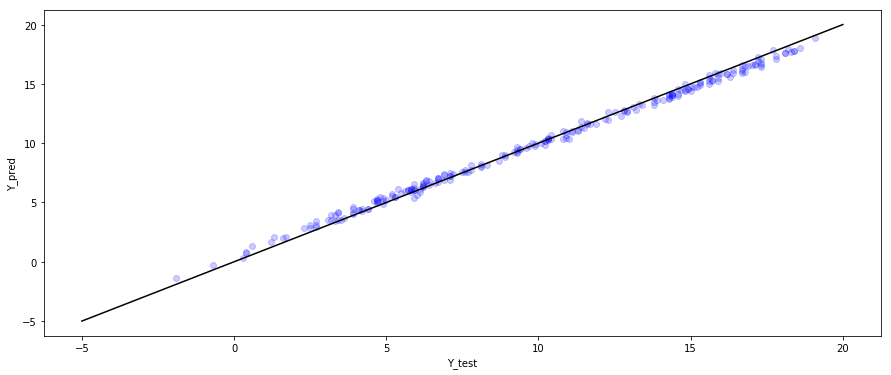

In [159]:
### Compare Y_test (unseen) against Y_pred
plt.figure(figsize=(15,6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.2)
plt.plot([-5,20], [-5,20], 'k-')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')